In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
faces, y = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=42) # we load the data 

In [3]:
#We want to see now what form these data have
faces

array([[0.1983471 , 0.23553719, 0.35123968, ..., 0.06198347, 0.12809917,
        0.09090909],
       [0.18595041, 0.12809917, 0.11570248, ..., 0.19008264, 0.2107438 ,
        0.2107438 ],
       [0.5082645 , 0.60330576, 0.6198347 , ..., 0.33471075, 0.3429752 ,
        0.3429752 ],
       ...,
       [0.61157024, 0.6446281 , 0.6570248 , ..., 0.17768595, 0.2107438 ,
        0.2231405 ],
       [0.28512397, 0.29338843, 0.29752067, ..., 0.53305787, 0.53305787,
        0.5371901 ],
       [0.3264463 , 0.1446281 , 0.2603306 , ..., 0.14049587, 0.30165288,
        0.1570248 ]], dtype=float32)

In [4]:
'''
We can see that it is an array, so we can check its dimensions. To do this:
looking at the documentation allows us to state that we have 400 photos and their size is 64x64 = 4096
'''
print(faces.shape)  

(400, 4096)


In [5]:
y # is a vector that consists of numbers from 1 to 40

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [6]:
pd.DataFrame(y).value_counts() # quick check allows us to believe that each person has 10
                               # of your photos, 10 * 40 = 400, hence 40 classes


0     10
1     10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
21    10
20    10
19    10
9     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
18    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
39    10
dtype: int64

In [7]:
faces.mean(axis=1).shape

(400,)

We can now define several sizes that will function for this whole notebook, these are the size of the photos and the photo normalization operation. More specifically, the PCA tries to keep the expected value (average) from being zero. It is a form of data set shift that does not affect their distribution, ie the point in the set that was farthest to the left will still remain after the shift. This is dos obvious as we will make linear transframing.

In [8]:
n_samples, n_features = faces.shape # number of photos and their size 

image_shape = (64, 64) # photo size

faces = faces - faces.mean(axis=0) # the operation discussed above, the expected value
                                            # pixels with coordinates (i, j) equals zero

We now have standardized individual pixels. Note, however, that we are not standardized within one observation. In fact, let's see the expected value of pixels for a single photo

In [9]:
'''
different from zero, so now we will do a similar thing as a moment ago only with regard to
the entire photo
'''
faces[0].mean() 

-0.04000274

In [10]:
faces -= faces.mean(axis=1).reshape(n_samples, -1) # we use reshape to have dimensions (400, 4096)

In [11]:
faces[0].mean() # we can see that this value is now close to zero

-3.0267984e-09

# Presentation of selected images

In [12]:
faces4 = faces[:4]
faces4.shape

(4, 4096)

In [15]:
def draw(images, even, image_shape = image_shape):
    plt.figure(figsize=(15,15))
    plt.suptitle("Chosen image", size=16)
    for i, img in enumerate(images[:even]):
        plt.subplot(even//2, 2, i + 1)
        plt.imshow(img.reshape(image_shape), 'gray') 
        plt.xticks(())
        plt.yticks(())

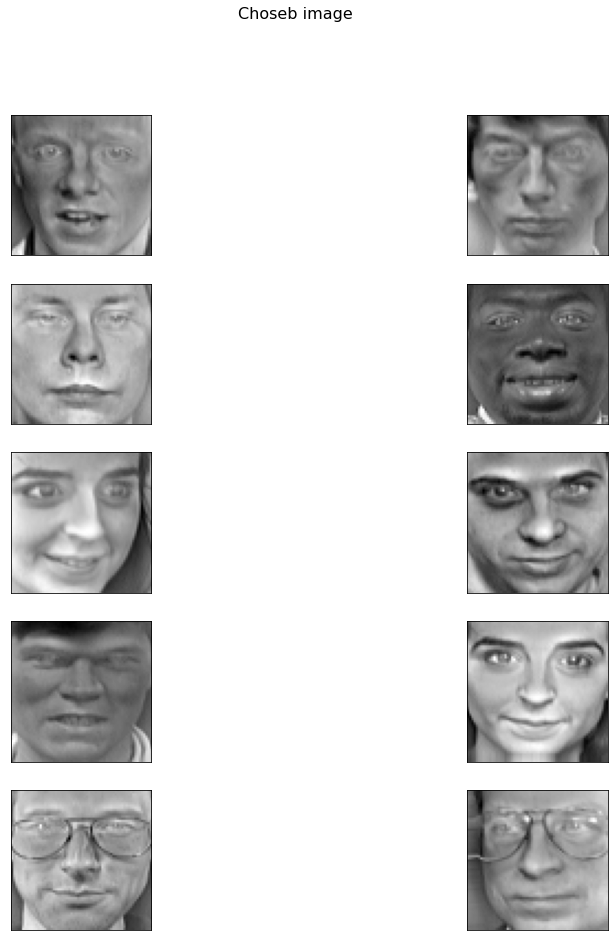

In [14]:
draw(faces, 10)

In [16]:
print(np.max(faces)) #maximum pixel value in the set
print(np.min(faces)) #minimum pixel value in the set

0.78123534
-0.7020994


Since the average pixel value is zero and their range is from -0.7020994 to 0.78123534, we obviously want the RMSE result to be as close to zero, but the 0.1 results in this case are a big deviation

In [18]:
def chooseDim(faces, n):
    rmse = []
    for i in range(400):
        model = PCA(n_components=i)
        model.fit(faces)
        m = model.transform(faces)
        y_pca = model.inverse_transform(m)
        loss = 1-mean_squared_error(faces[:n], y_pca[:n], squared=False)
        rmse.append(loss)
    return np.cumsum(model.explained_variance_ratio_), rmse

In [19]:
variance, rmse = chooseDim(faces, 400)

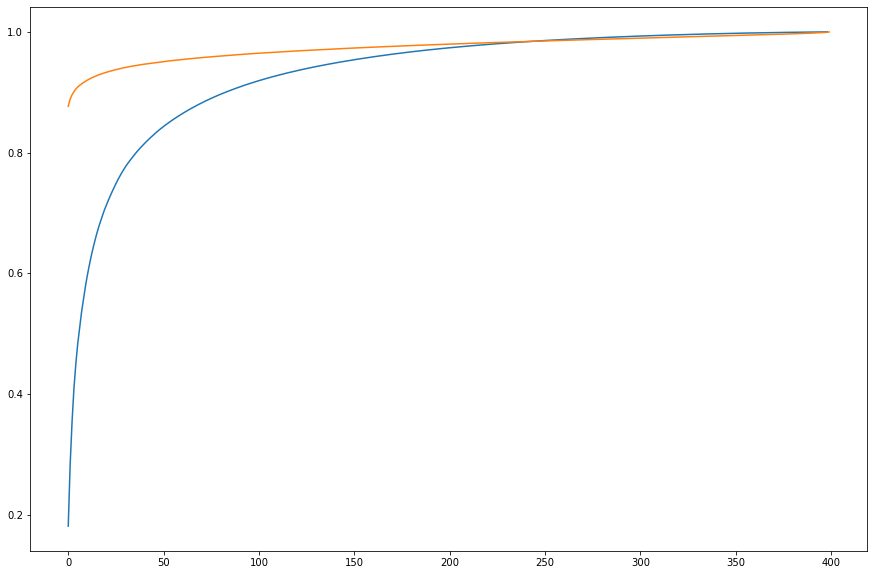

In [20]:
plt.figure(figsize = (15,10))
plt.plot(range(len(variance)), variance) # dependence of the amount of data on their variance
plt.plot(range(len(rmse)), rmse)# data dependence on result 1 - RMSE after reconstruction
plt.show()

We see that somewhere from 200 we have information about practically the entire variance, while the satisfactory RMSE is already around 100

In [22]:
model = PCA(n_components=200)
model.fit(faces)
m = model.transform(faces)
y_pca = model.inverse_transform(m)

In [461]:
mean_squared_error(faces, y_pca, squared=False)

0.020168334

# Compression rate

In [23]:
sk = faces.shape[1]/m.shape[1]
print(sk)

20.48


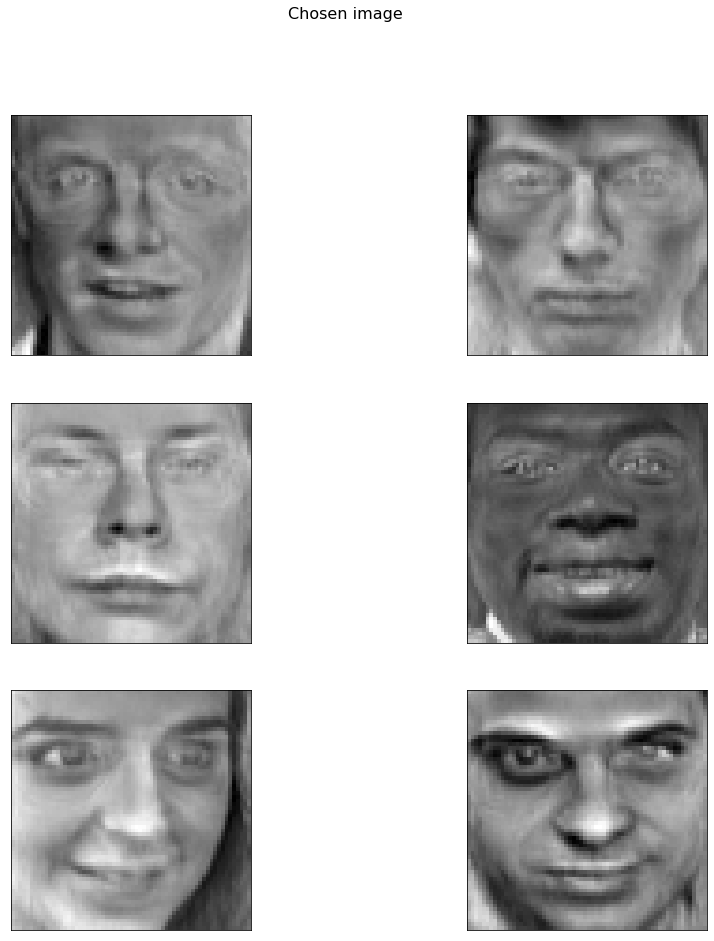

In [24]:
draw(y_pca, 6)

# Photo augmentation

In [25]:
_augmentation_transform = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10, # rotation range
    horizontal_flip=True, 
    # vertical_flip = True, #can be added, but rather pointless
    brightness_range=(0.9, 1.1), # change of brightness
)

In [26]:
def newImages(images, image_shape):
    arr_img = []
    for img in images:
        img = img.reshape(*image_shape)
        img = np.expand_dims(img, 2).reshape(*image_shape ,1)
        img = _augmentation_transform.random_transform(img)
        arr_img.append(img)
    return arr_img

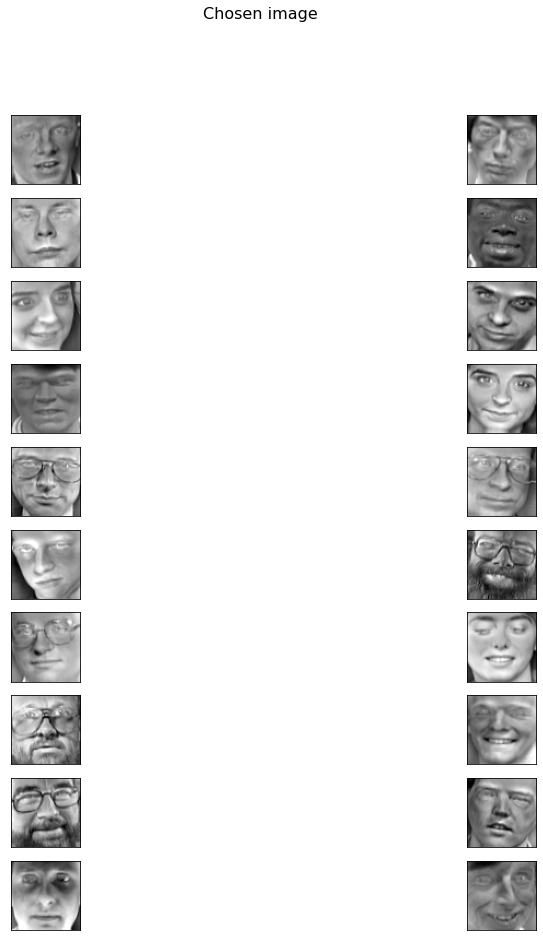

In [27]:
arr = newImages(faces[:20], (64,64))
draw(arr, 20)

In [28]:
arr = np.array(arr).reshape(20,-1)
m_changes = model.transform(arr)
y_pca_changes = model.inverse_transform(m_changes)

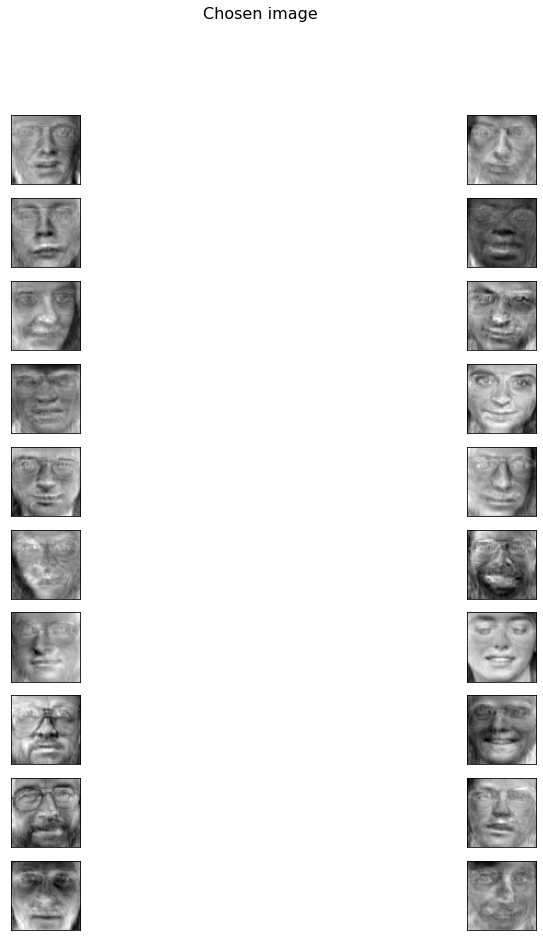

In [29]:
draw(y_pca_changes, 20)

In [30]:
print(f"RMSE: {mean_squared_error(arr, y_pca_changes, squared=False)}")

RMSE: 136.69163513183594


You can see that the algorithm is trying to recreate the face, but with mixed success. This should not be surprising since he was learned a little on a different dataset in the sense that we have different rotations and discolorations here. What the PCA could be good for is, for example, assuming that the photo is taken, so that the center of the face is in the center of the photo, its horizontal inversion could determine whether someone has a symmetrical face or to what extent